<h1>ANÁLISE DE CRÉDITO</h1>


In [18]:
import pandas as pd
import numpy as np

# Gerar dados fictícios
np.random.seed(42)
n = 5  

dados = pd.DataFrame({
    'idade': np.random.randint(18, 70, size=n),
    'salario_mensal': np.random.normal(5000, 1500, size=n).round(2),
    'tempo_emprego_anos': np.random.exponential(scale=5, size=n).round(1),
    'pontuacao_credito': np.random.randint(300, 850, size=n),
    'emprestimos_anteriores': np.random.poisson(1.5, size=n),
    'inadimplente': np.random.binomial(1, 0.2, size=n)
})

# Exibir a tabela organizada
print(dados.to_string(index=False))


 idade  salario_mensal  tempo_emprego_anos  pontuacao_credito  emprestimos_anteriores  inadimplente
    56         5710.79                 0.8                685                       1             0
    69         7052.68                 5.3                491                       0             0
    46         3624.76                 0.3                576                       1             1
    32         4813.78                 6.4                460                       0             0
    60         1983.56                13.9                759                       2             1


In [10]:
# Exibir as primeiras linhas da base de dados
print("\n Primeiras 5 linhas do DataFrame:")
print(dados.head().to_string(index=False))

# Estatísticas descritivas
print("\n Estatísticas descritivas das variáveis numéricas:")
print(dados.describe().T.round(2))  # transposto e arredondado

# Distribuição da variável-alvo
print("\n Proporção de inadimplentes vs. não inadimplentes:")
print(dados['inadimplente'].value_counts(normalize=True).rename({0: 'Adimplente', 1: 'Inadimplente'}).apply(lambda x: f'{x:.1%}'))



 Primeiras 5 linhas do DataFrame:
 idade  salario_mensal  tempo_emprego_anos  pontuacao_credito  emprestimos_anteriores  inadimplente
    56         5710.79                 0.8                685                       1             0
    69         7052.68                 5.3                491                       0             0
    46         3624.76                 0.3                576                       1             1
    32         4813.78                 6.4                460                       0             0
    60         1983.56                13.9                759                       2             1

 Estatísticas descritivas das variáveis numéricas:
                        count     mean      std      min      25%      50%  \
idade                     5.0    52.60    14.17    32.00    46.00    56.00   
salario_mensal            5.0  4637.11  1941.98  1983.56  3624.76  4813.78   
tempo_emprego_anos        5.0     5.34     5.49     0.30     0.80     5.30   
p

In [4]:
from sklearn.model_selection import train_test_split

X = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


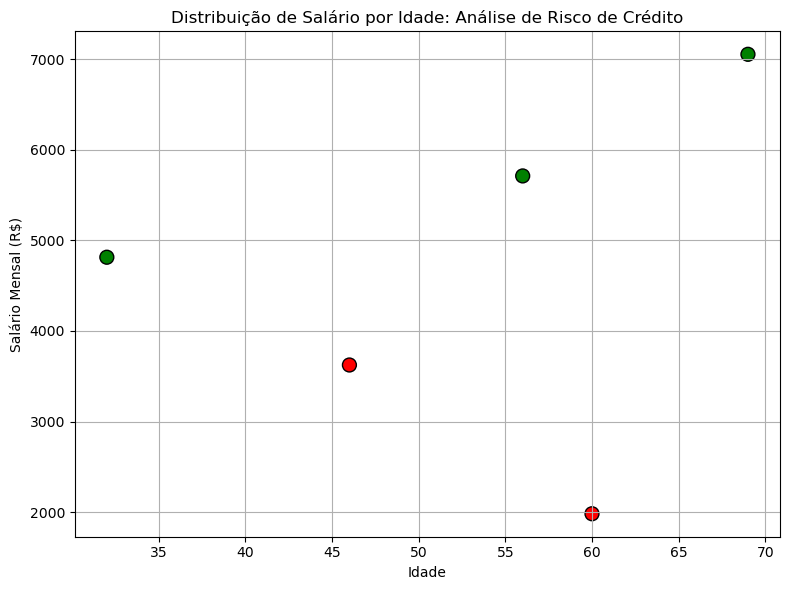

In [16]:
import matplotlib.pyplot as plt

# Define as cores: verde = adimplente, vermelho = inadimplente
cores = dados['inadimplente'].map({0: 'green', 1: 'red'})

plt.figure(figsize=(8, 6))
plt.scatter(dados['idade'], dados['salario_mensal'], c=cores, s=100, edgecolors='black')
plt.title('Distribuição de Salário por Idade: Análise de Risco de Crédito' )
plt.xlabel('Idade')
plt.ylabel('Salário Mensal (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()
